In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_excel("linear regression.xlsx")
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


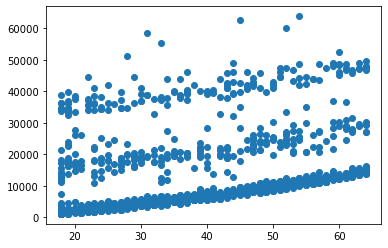

In [84]:
x = df['age']
y = df['charges']
plt.scatter(x,y)

In [85]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

In [86]:
df[categorical_features].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [87]:
for i in categorical_features:
    print(f"feature is {i} and categories are {len(df[i].unique())}")

feature is sex and categories are 2
feature is smoker and categories are 2
feature is region and categories are 4


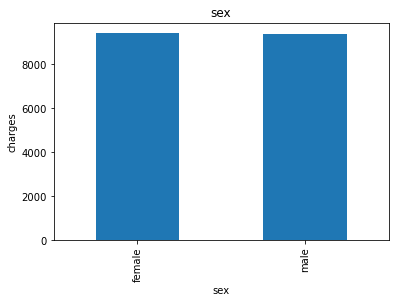

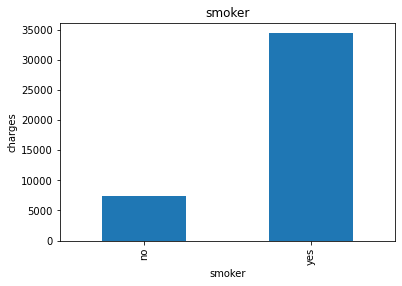

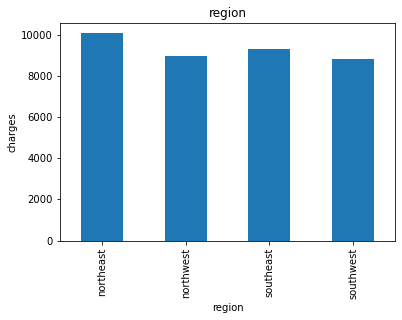

In [88]:
df1 = df.copy()
for i in categorical_features:
    df.groupby(i)['charges'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('charges')
    plt.title(i)
    plt.show()

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   smoker   1338 non-null   object 
 4   region   1338 non-null   object 
 5   charges  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [90]:
df1.shape

(1338, 6)

In [91]:
df2 = df1.dropna()

In [92]:
df2.shape

(1338, 6)

In [93]:
temp = pd.get_dummies(df2['smoker'])
temp

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [94]:
f = temp.drop('no',axis = 1)

In [95]:
f.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [96]:
df3 = df2.merge(f, left_index=True,right_index=True,)
df3

,age,sex,bmi,smoker,region,charges,yes
0,19,female,27.900,yes,southwest,16884.92400,1
1,18,male,33.770,no,southeast,1725.55230,0
2,28,male,33.000,no,southeast,4449.46200,0
3,33,male,22.705,no,northwest,21984.47061,0
4,32,male,28.880,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,no,northwest,10600.54830,0
1334,18,female,31.920,no,northeast,2205.98080,0
1335,18,female,36.850,no,southeast,1629.83350,0
1336,21,female,25.800,no,southwest,2007.94500,0


In [97]:
df3.drop('smoker',axis = 1, inplace=True)

In [98]:
df3

,age,sex,bmi,region,charges,yes
0,19,female,27.900,southwest,16884.92400,1
1,18,male,33.770,southeast,1725.55230,0
2,28,male,33.000,southeast,4449.46200,0
3,33,male,22.705,northwest,21984.47061,0
4,32,male,28.880,northwest,3866.85520,0
...,...,...,...,...,...,...
1333,50,male,30.970,northwest,10600.54830,0
1334,18,female,31.920,northeast,2205.98080,0
1335,18,female,36.850,southeast,1629.83350,0
1336,21,female,25.800,southwest,2007.94500,0


In [99]:
temp_sex = pd.get_dummies(df3['sex'])
temp_sex.drop('female', axis = 1, inplace = True)

In [100]:
temp_sex

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [101]:
df3["Sex_n"] = temp_sex['male'].values

In [102]:
df3.head()

,age,sex,bmi,region,charges,yes,Sex_n
0,19,female,27.900,southwest,16884.92400,1,0
1,18,male,33.770,southeast,1725.55230,0,1
2,28,male,33.000,southeast,4449.46200,0,1
3,33,male,22.705,northwest,21984.47061,0,1
4,32,male,28.880,northwest,3866.85520,0,1


In [103]:
df3.drop('sex', axis = 1, inplace = True)
df3.head()

,age,bmi,region,charges,yes,Sex_n
0,19,27.900,southwest,16884.92400,1,0
1,18,33.770,southeast,1725.55230,0,1
2,28,33.000,southeast,4449.46200,0,1
3,33,22.705,northwest,21984.47061,0,1
4,32,28.880,northwest,3866.85520,0,1


In [104]:
temp_region = pd.get_dummies(df3['region'])

In [105]:
temp_region.drop('northwest', axis = 1, inplace = True)

In [106]:
temp_region

,northeast,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
1333,0,0,0
1334,1,0,0
1335,0,1,0
1336,0,0,1


In [107]:
df4 = df3.copy()
df4.head()

,age,bmi,region,charges,yes,Sex_n
0,19,27.900,southwest,16884.92400,1,0
1,18,33.770,southeast,1725.55230,0,1
2,28,33.000,southeast,4449.46200,0,1
3,33,22.705,northwest,21984.47061,0,1
4,32,28.880,northwest,3866.85520,0,1


In [130]:
df5 = df4.merge(temp_region, left_index= True, right_index=True)

In [131]:
df5.head()

,age,bmi,region,charges,yes,Sex_n,northeast,southeast,southwest
0,19,27.900,southwest,16884.92400,1,0,0,0,1
1,18,33.770,southeast,1725.55230,0,1,0,1,0
2,28,33.000,southeast,4449.46200,0,1,0,1,0
3,33,22.705,northwest,21984.47061,0,1,0,0,0
4,32,28.880,northwest,3866.85520,0,1,0,0,0


In [132]:
df5.drop('region', axis = 1, inplace=True)
df5.head()

,age,bmi,charges,yes,Sex_n,northeast,southeast,southwest
0,19,27.900,16884.92400,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0
2,28,33.000,4449.46200,0,1,0,1,0
3,33,22.705,21984.47061,0,1,0,0,0
4,32,28.880,3866.85520,0,1,0,0,0


In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X = df5.drop('charges', axis = 1)

In [136]:
X

,age,bmi,yes,Sex_n,northeast,southeast,southwest
0,19,27.900,1,0,0,0,1
1,18,33.770,0,1,0,1,0
2,28,33.000,0,1,0,1,0
3,33,22.705,0,1,0,0,0
4,32,28.880,0,1,0,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,0,1,0,0,0
1334,18,31.920,0,0,1,0,0
1335,18,36.850,0,0,0,1,0
1336,21,25.800,0,0,0,0,1


In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,df4['charges'],test_size = 0.1)

In [141]:
model.fit(X_train,Y_train)

LinearRegression()

In [142]:
model.score(X_test, Y_test)

0.8107935098438155

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Real estate.csv")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
df1 = df.copy()

In [15]:
df2 = df1.drop(['X1 transaction date', 'X5 latitude', 'X6 longitude','No'], axis = 1)
df2

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 13.1 KB


In [17]:
numerical_features = [i for i in df2.columns if df[i].dtype != 'O']
numerical_features

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'Y house price of unit area']

In [19]:
df2.isnull().any()

X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
Y house price of unit area                False
dtype: bool

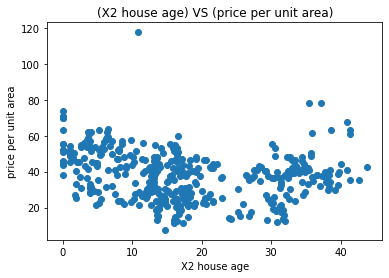

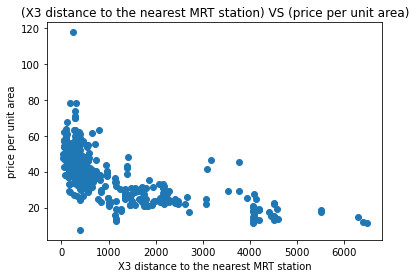

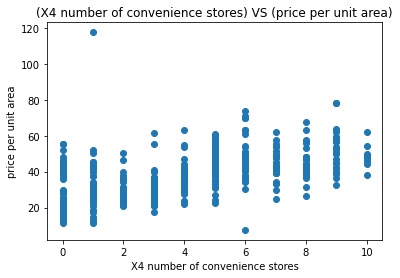

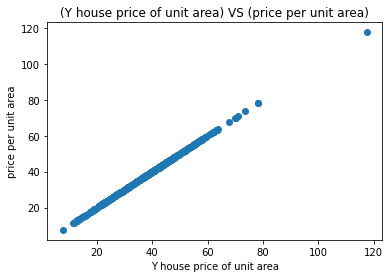

In [22]:
for i in numerical_features:
    x = df2[i]
    y = df2['Y house price of unit area']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('price per unit area')
    plt.title(f'({i}) VS (price per unit area)')
    plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df2.drop('Y house price of unit area', axis = 1)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,df2['Y house price of unit area'],test_size = 0.1)

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
model.score(X_test,Y_test)

0.6367470331022296